In [1]:
from google.colab import userdata
key = userdata.get('hf-api')

from huggingface_hub import login
login(token=key)

In [5]:
!pip install fpdf==1.7.2
!pip install lorem pandas

In [6]:
from fpdf import FPDF
import lorem
import pandas as pd

# 표 출력을 위해, 데이터 프레임 생성
df = pd.DataFrame(
          {'feature 1' : ['cat 1', 'cat 2', 'cat 3', 'cat 4'],
           'feature 2' : [400, 300, 200, 100]
          })


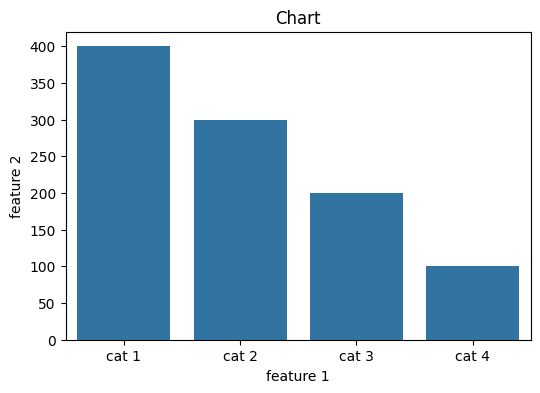

In [7]:
# 차트 그림 생성
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize = (6, 4))
sns.barplot(data =  df, x = 'feature 1', y = 'feature 2')
plt.title("Chart")
plt.savefig('./example_chart.png',
           transparent=False,
           facecolor='white',
           bbox_inches="tight")

In [8]:
# PDF 클래스 생성
ch = 8
class PDF(FPDF):
    def __init__(self):
        super().__init__()
    def header(self):
        self.set_font('Arial', '', 12)
        self.cell(0, 8, 'Header', 0, 1, 'C')
    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', '', 12)
        self.cell(0, 8, f'Page {self.page_no()}', 0, 0, 'C')



In [9]:
# 셀을 생성하고, 각 셀에 보고서 내용 설정
pdf = PDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 24)
pdf.cell(w=0, h=20, txt="Title", ln=1)
pdf.set_font('Arial', '', 16)
pdf.cell(w=30, h=ch, txt="Date: ", ln=0)
pdf.cell(w=30, h=ch, txt="01/01/2022", ln=1)
pdf.cell(w=30, h=ch, txt="Author: ", ln=0)
pdf.cell(w=30, h=ch, txt="Max Mustermann", ln=1)
pdf.ln(ch)
pdf.multi_cell(w=0, h=5, txt=lorem.paragraph())
pdf.image('./example_chart.png', x = 10, y = None, w = 100, h = 0, type = 'PNG', link = '') # 차트 이미지 입력
pdf.ln(ch)
pdf.multi_cell(w=0, h=5, txt=lorem.paragraph())
pdf.ln(ch)

In [10]:
# 표 헤더 및 내용 설정
pdf.set_font('Arial', 'B', 16)
pdf.cell(w=40, h=ch, txt='Feature 1', border=1, ln=0, align='C')
pdf.cell(w=40, h=ch, txt='Feature 2', border=1, ln=1, align='C')
# Table contents
pdf.set_font('Arial', '', 16)
for i in range(len(df)):
    pdf.cell(w=40, h=ch, txt=df['feature 1'].iloc[i], border=1, ln=0, align='C')
    pdf.cell(w=40, h=ch, txt=df['feature 2'].iloc[i].astype(str), border=1, ln=1, align='C')

# PDF 저장
pdf.output("example.pdf")

''

In [11]:
!ls

example_chart.png  example.pdf	sample_data


In [12]:
from google.colab import files
files.download('example.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
!pip install PyPDF2==3.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 17.0 MB/s eta 0:00:00


In [15]:
import re, PyPDF2


In [26]:
def extract_text(pdf_fname = './example.pdf'):  # sample.pdf 파일을 준비한다. 이 경우는 논문의 ABSTRACT 부분을 추출하는 것으로 코딩되었다.
    pdf_file = open(pdf_fname, 'rb')
    pdf_reader = PyPDF2.PdfReader(pdf_file)

    first_page = pdf_reader.pages[0]
    text = first_page.extract_text()

    abstract_start = text.find('Author')  # abstract keyword 검색
    abstract_start += len('Author')
    abstract_end = text.find('Feature')
    abstract = text[abstract_start:abstract_end]

    # remove new line characters
    abstract = abstract.replace('\n', ' ')

    # remove digits and special characters
    # abstract = re.sub(r'[^a-zA-Z0-9().,% ]', '', abstract)
    return abstract



In [27]:
text = extract_text()
text

': Max Mustermann Dolore neque quaerat consectetur velit quiquia. Ipsum sit non velit ipsum. Dolore sit ipsum quisquam ipsum amet quiquia. Adipisci dolorem etincidunt dolorem tempora non. Sed quaerat eius dolor dolor porro. Etincidunt numquam ut velit modi. Consectetur dolore dolor etincidunt eius consectetur numquam. Aliquam aliquam porro tempora dolorem numquam est consectetur. Consectetur voluptatem velit dolor magnam. Quisquam dolor porro etincidunt aliquam modi tempora. Sit velit porro neque modi adipisci labore sit. Labore quaerat magnam est ut adipisci. Est numquam numquam quisquam tempora magnam ut quiquia. Ipsum velit tempora sed etincidunt ipsum ut. Velit voluptatem ipsum quisquam velit. Quiquia magnam aliquam dolorem. Sed adipisci porro velit etincidunt. '